In [9]:
import yfinance as yf

stock_tickers =['UNH','AMT','BAC','USB','BRK-B'] 

database = yf.download(stock_tickers,start='2012-01-01',end ='2025-01-01',auto_adjust=True)
database = database['Close']
data = database.dropna().pct_change(1).dropna()
data

[*********************100%***********************]  5 of 5 completed


Ticker,AMT,BAC,BRK-B,UNH,USB
Date,,,,,
2012-01-04,0.014453,0.001724,-0.011328,0.014566,-0.000362
2012-01-05,0.011566,0.086058,0.001693,0.006700,0.014871
2012-01-06,-0.001657,-0.020602,-0.007019,0.003613,-0.008220
2012-01-09,0.002821,0.014563,-0.001309,-0.001136,0.017658
2012-01-10,0.014731,0.057416,0.014812,-0.001897,0.000708
...,...,...,...,...,...
2024-12-24,0.001790,0.011164,0.009486,-0.000474,0.010555
2024-12-26,-0.003952,0.003831,0.000916,0.009978,0.003686
2024-12-27,-0.002687,-0.004714,-0.005598,-0.002269,-0.010610


In [10]:
import numpy as np

def MV_Criterion(weight,data):
    Lambda = 3
    W = 1
    Wbar= (1+0.25)/100
    
    portfolio_return = np.multiply(data,np.transpose(weight))
    portfolio_return = portfolio_return.sum(axis=1)
    
    mean = np.mean(portfolio_return,axis=0)
    std = np.std(portfolio_return,axis=0)
    criterion = (Wbar**(-1-Lambda))/1+Lambda +(Wbar**-Lambda)*W*mean - (Wbar**(-1-Lambda))*Lambda*0.5*W**2*std**2
    
    return -1*criterion
    

In [11]:
##calculating the weights 
import numpy as np
from scipy.optimize import Bounds, minimize

validation_score = 0.3
train_size = int(len(data)*(1-validation_score))
train_data = data.iloc[:train_size,:]
test_data = data.iloc[train_size:,:]

n = data.shape[1]
x0 = np.ones(n)

cons = ({'type':'eq','fun':lambda x:np.sum(abs(x))-1})

Bounds = [(0,1) for i in range(0,n)]

res = minimize(MV_Criterion,x0,args=data,method="SLSQP",constraints=cons,bounds=Bounds,options={'disp':False})
res.x


array([2.40814002e-01, 8.02278998e-08, 6.04236043e-01, 1.54949943e-01,
       0.00000000e+00])

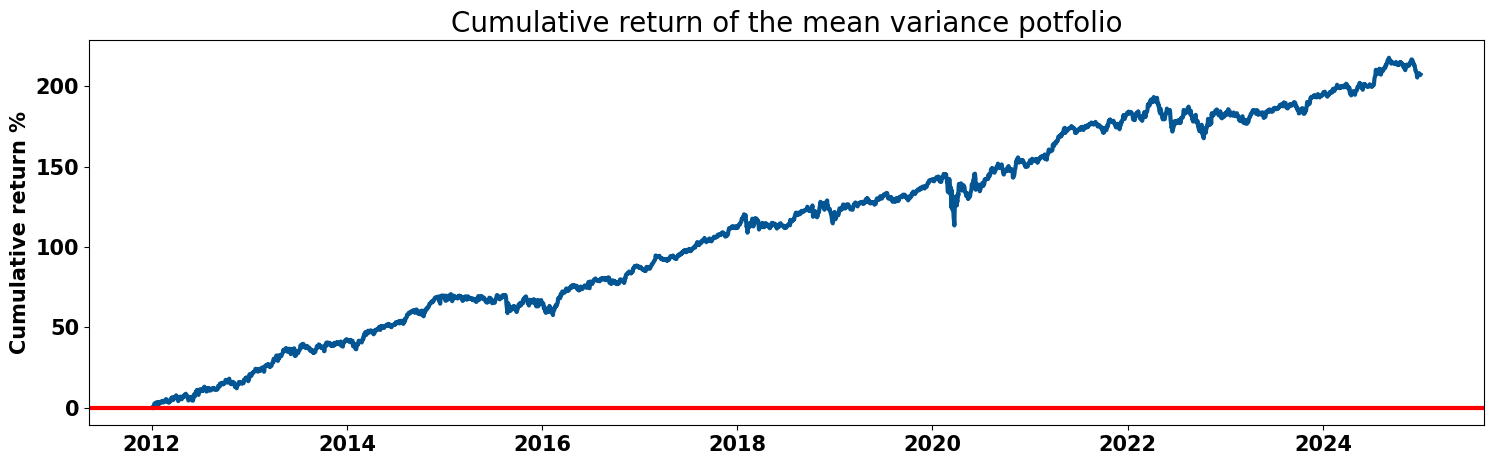

In [12]:
#Testing the perfomance on the test data
import matplotlib.pyplot as plt


portfolio_return_test = np.multiply(data,np.transpose(res.x))
portfolio_return_test = portfolio_return_test.sum(axis=1)

#plot the cumulative return
plt.figure(figsize=(18,5))
plt.plot(np.cumsum(portfolio_return_test)*100,color="#035593",linewidth=3)
plt.ylabel("Cumulative return %", size=15,fontweight="bold")
plt.xticks(size=15,fontweight="bold")
plt.yticks(size=15,fontweight="bold")
plt.title("Cumulative return of the mean variance potfolio", size=20)
plt.axhline(0, color="r",linewidth=3)
plt.show()